In [1]:
%load_ext autoreload
%autoreload 2

from face_tally.ml_logic.image_prediction import predict_bounding_boxes, create_image
from ultralytics import YOLO
import numpy as np
from PIL import Image
from pillow_heif import register_heif_opener
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace


/home/matias/.pyenv/versions/3.10.6/envs/facetally/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-05 14:16:41.829840: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 14:16:41.830494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 14:16:42.985105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Directory  /home/matias /.deepface created
Directory  /home/matias /.deepface/weights created


In [2]:
model = YOLO("yolov8n.pt")


In [96]:
image_file_path = "trial_images/random_family_pic.jpg"

image_prereshape = Image.open(image_file_path)
model_shape = (778, 438)

image = image_prereshape.resize(model_shape)
array_original_image = np.array(image)

print("New dimensions of the image:", array_original_image.shape)


New dimensions of the image: (438, 778, 3)


In [97]:
def crop_images(original_image_array: np.array, bound_boxes: dict) -> np.array:
    """
    Takes both:
    - The original image array
    - The result from the bounding boxes

    And returns an image with both elements in array format
    """

    faces_list = []

    # Create an OpenCV image from the numeric array
    opencv_image = cv2.cvtColor(original_image_array, cv2.COLOR_RGB2BGR)

    # Annotate bounding boxes on the OpenCV image
    for box_info in bound_boxes:
        coordinates = box_info["Coordinates"]

        face = opencv_image[int(coordinates[1]): int(coordinates[3]),  # (y1, y2)
                            int(coordinates[0]): int(coordinates[2])]  # (x1, x2)

        face_colored = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

        faces_list.append(face_colored)


    # Display or save the annotated image as needed
    return faces_list


In [98]:
bbs = predict_bounding_boxes(image, model)
croped_images = crop_images(array_original_image, bbs)


0: 384x640 4 persons, 389.6ms
Speed: 6.4ms preprocess, 389.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


In [99]:
print(len(croped_images))
len(croped_images[0])


4


257

In [69]:
DeepFace.analyze(croped_images[3], actions=["race"])


Action: race: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


[{'race': {'asian': 0.013378517178352922,
   'indian': 0.012929845252074301,
   'black': 0.0006481355285359314,
   'white': 93.80576610565186,
   'middle eastern': 1.8366416916251183,
   'latino hispanic': 4.330635815858841},
  'dominant_race': 'white',
  'region': {'x': 52, 'y': 38, 'w': 75, 'h': 75}}]

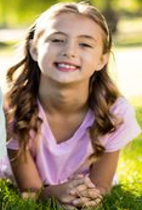

In [101]:
img = Image.fromarray(croped_images[1])
img
